# Implementación de PCA

Recordemos que dado un vector aleatorio $X=(X_{1},\dots, X_{n})$ con $\Sigma_{X}$ su matriz de covarianza (que supondremos no degenerada), podemos definir la $j$-ésima componente principal de $X$ como
$$\xi_{j}=b_{j}\bullet X,$$
en dónde $b_{j}=(b_{j1},\dots, b_{jn})$ es un vector en $\mathbb{R}^{n}$ que se elige de acuerdo al siguiente problema de optimización:

$$\begin{align}
\max \text{Var}(\xi_{j})&=b_{j}\bullet\Sigma_{X}\bullet b_{j}\\
\text{sujeta a}&\\
||b_{j}||&=1 \quad \text{y} \quad b_{i}\bullet b_{j}=0 \ \ \forall i>j\geq 1.
\end{align}$$

**Teorema.-** Sea $X=(X_{1},\dots, X_{n})$ un vector aleatorio y sea $\Sigma_{X}$ su matriz de covarianza. Entonces, el problema de optimización para el sistema de ecuaciones $\{\xi_{j}\}_{j=1}^{p}$ tiene la siguiente solución:


1.   Descomponemos espectralmente a la matriz $Σ_{X}$ como $Σ_{X}=Q\Lambda Q^{-1}$, en donde $\Lambda=\text{diag}(\lambda_{1},\dots, \lambda_{n})$ con $\lambda_{i}\in Spec(Σ_{X})$ y $Q$ se forma a través de las eigenparejas $(λ_{i},b_{i})$.
2.   Ordenamos los eigenvalores de manera decreciente:
$$λ_{1}\geq\lambda_{2}\geq \cdots \geq λ_{n}$$



Aplicaremos el teorema anterior para dar una implementación del PCA usando datos sintéticos. Luego, aplicaremos nuestro resultado a la base de datos Iris de Fisher.

In [ ]:
# Cómo crear datos sintéticos y matrices

import numpy as np

X = np.random.randint(10, 50, 100)
X

array([45, 36, 22, 25, 34, 22, 21, 17, 20, 48, 36, 20, 34, 42, 28, 16, 19,
       10, 19, 14, 16, 19, 27, 30, 32, 10, 28, 30, 13, 42, 25, 23, 44, 38,
       16, 14, 41, 32, 22, 32, 39, 20, 31, 35, 27, 27, 34, 40, 40, 14, 21,
       36, 33, 31, 15, 27, 31, 22, 44, 12, 21, 26, 46, 20, 39, 33, 32, 41,
       38, 12, 42, 11, 14, 25, 34, 27, 14, 13, 20, 30, 41, 46, 26, 47, 10,
       16, 35, 13, 41, 26, 40, 15, 26, 22, 40, 27, 49, 24, 36, 41])

In [ ]:
X.ndim

1

In [ ]:
X.shape

(100,)

In [ ]:
# Se calcula la media del vector

np.mean(X)

28.0

In [ ]:
# Creamos una matriz a partir del arreglo anterior

Y = X.reshape(20,5)
Y

array([[45, 36, 22, 25, 34],
       [22, 21, 17, 20, 48],
       [36, 20, 34, 42, 28],
       [16, 19, 10, 19, 14],
       [16, 19, 27, 30, 32],
       [10, 28, 30, 13, 42],
       [25, 23, 44, 38, 16],
       [14, 41, 32, 22, 32],
       [39, 20, 31, 35, 27],
       [27, 34, 40, 40, 14],
       [21, 36, 33, 31, 15],
       [27, 31, 22, 44, 12],
       [21, 26, 46, 20, 39],
       [33, 32, 41, 38, 12],
       [42, 11, 14, 25, 34],
       [27, 14, 13, 20, 30],
       [41, 46, 26, 47, 10],
       [16, 35, 13, 41, 26],
       [40, 15, 26, 22, 40],
       [27, 49, 24, 36, 41]])

In [ ]:
np.mean(Y, axis = 0) # Calcula la media por columnas y las muestra en un arreglo

array([29.25, 30.6 , 28.95, 30.6 , 31.25])

In [ ]:
np.mean(Y, axis = 1) # Calcula la media por renglones y las muestra en un arreglo

array([38.6, 30.4, 29. , 32.2, 33.4, 38.2, 30.2, 32. , 29.6, 19.4, 24. ,
       32. , 24.4, 20.2, 37.6, 25.4, 34. , 30.6, 29.8, 31.6])

### Preprocesamiento de datos

In [ ]:
# Centramos a los datos

Y_media = Y - np.mean(Y, axis = 0)
Y_media

array([[ 17.75,   8.2 ,  -5.25,  -5.4 ,   6.7 ],
       [ -5.25,  -6.8 , -10.25, -10.4 ,  20.7 ],
       [  8.75,  -7.8 ,   6.75,  11.6 ,   0.7 ],
       [-11.25,  -8.8 , -17.25, -11.4 , -13.3 ],
       [-11.25,  -8.8 ,  -0.25,  -0.4 ,   4.7 ],
       [-17.25,   0.2 ,   2.75, -17.4 ,  14.7 ],
       [ -2.25,  -4.8 ,  16.75,   7.6 , -11.3 ],
       [-13.25,  13.2 ,   4.75,  -8.4 ,   4.7 ],
       [ 11.75,  -7.8 ,   3.75,   4.6 ,  -0.3 ],
       [ -0.25,   6.2 ,  12.75,   9.6 , -13.3 ],
       [ -6.25,   8.2 ,   5.75,   0.6 , -12.3 ],
       [ -0.25,   3.2 ,  -5.25,  13.6 , -15.3 ],
       [ -6.25,  -1.8 ,  18.75, -10.4 ,  11.7 ],
       [  5.75,   4.2 ,  13.75,   7.6 , -15.3 ],
       [ 14.75, -16.8 , -13.25,  -5.4 ,   6.7 ],
       [ -0.25, -13.8 , -14.25, -10.4 ,   2.7 ],
       [ 13.75,  18.2 ,  -1.25,  16.6 , -17.3 ],
       [-11.25,   7.2 , -14.25,  10.6 ,  -1.3 ],
       [ 12.75, -12.8 ,  -1.25,  -8.4 ,  12.7 ],
       [ -0.25,  21.2 ,  -3.25,   5.6 ,  13.7 ]])

In [ ]:
# Matriz de covarianza

S = np.cov(Y_media, rowvar = False)

print(S)

[[110.30263158 -11.05263158  -1.43421053  34.94736842 -11.81578947]
 [-11.05263158 115.43157895  24.          44.76842105 -29.35789474]
 [ -1.43421053  24.         113.67105263  24.78947368 -23.18421053]
 [ 34.94736842  44.76842105  24.78947368 101.30526316 -76.44210526]
 [-11.81578947 -29.35789474 -23.18421053 -76.44210526 140.74736842]]


In [ ]:
# Vamos a calcular eigenvalores y eigenvectores

eigen_val, eigen_vec = np.linalg.eigh(S)

In [ ]:
eigen_val

array([ 28.66020457,  86.34625973,  96.98872063, 128.18536156,
       241.27734826])

In [ ]:
# Accesos

eigen_val[::-1]


array([241.27734826, 128.18536156,  96.98872063,  86.34625973,
        28.66020457])

In [ ]:
# Reescribimos a los eigenvalores de manera decreciente

eigen_val = eigen_val[np.argsort(eigen_val)[::-1]]

eigen_val

array([241.27734826, 128.18536156,  96.98872063,  86.34625973,
        28.66020457])

In [ ]:
eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]

eigen_vec

array([[-0.51323607, -0.22161799,  0.78605086, -0.26379812,  0.00296669],
       [-0.60530793, -0.19408686, -0.24627123,  0.6114121 ,  0.40181878],
       [-0.05875522,  0.51897819,  0.30623606,  0.58474937, -0.53990473],
       [-0.03242531, -0.71196258, -0.18333702,  0.10739291, -0.66851491],
       [ 0.60472099, -0.37011712,  0.44054686,  0.45068918,  0.31642308]])

In [ ]:
n_components = 2
eigenvector_2 = eigen_vec[:,0:n_components]

In [ ]:
# Descomposición espectral

Y_red = np.dot(eigenvector_2.transpose(),Y_media.transpose()).transpose()


Y_red

array([[-11.2199911 , -10.96911078],
       [ -5.98778071,  -1.89544734],
       [ -6.31196943,  13.38910019],
       [  8.16571358,   2.41943758],
       [ -5.02171911, -14.34360577],
       [  8.03589009,  -2.76902199],
       [  6.574672  , -17.17951324],
       [ -8.39689461,   2.77641029],
       [ -1.08973548,  -5.60548179],
       [ -0.2710719 ,   6.91119961],
       [ -2.78432951,  25.11489889],
       [  7.76889762,  -8.31744331],
       [ -2.58878852,  -1.1429342 ],
       [  4.56830517,  -5.28535861],
       [ -7.89095502,   0.52491273],
       [  4.58776383,  12.74940158],
       [ -3.90480262,  -3.21524009],
       [ 16.19862558,   1.42650227],
       [ -4.13227923,  -7.44035946],
       [  3.70044936,  12.85165343]])

## La parte de la varianza explicada

**Definición.-** Llamamos a la parte de la varianza total de $X$ explicada por las primeras $k$ componentes principales $(\xi_{1},\dots, \xi_{k})_{k< p}$ a la cantidad:
$$\frac{λ_{1}+\cdots +λ_{k}}{\text{Tr}(Σ_{X})}.$$

Denotamos por $\rho_{ij}=\text{Corr}(\xi_{i},X_{i})$. Llamaremos a $\rho_{ij}^{2}$ la parte de la varianza de la variable $X_{i}$ explicada por la $j$-ésima componente principal $\xi_{j}$.

In [ ]:
# Información total

eigen_val_total = sum(eigen_val)

varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]

varianza_explicada = np.round(varianza_explicada, 2)

varianza_explicada_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada: {}".format(varianza_explicada))

print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada))

Varianza explicada: [28.32 25.24 22.42 16.31  7.72]
Varianza explicada acumulada: [ 28.32  53.56  75.98  92.29 100.01]


In [ ]:
# Escribimos lo anterior como función
def PCA(X , num_componentes):

    X_media = X - np.mean(X , axis = 0)

    cov_mat = np.cov(X_media , rowvar = False)

    eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_index]
    sorted_eigenvec = eigen_vec[:,sorted_index]

    eigenvector_ = sorted_eigenvec[:,0:num_componentes]

    X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()

    return X_red

Analicemos la influencia de la componente principal $\xi_{j}$ sobre la variable $X_i$.

Se tienen las siguientes propiedades:

1.   $\text{Cov}(X_i,\xi_j)=$
2.   $\widetilde{\rho}_{ij}=\text{Corr}(X_i,\xi_j)=$
3.   $\sum_{i=1}^{p}\widetilde{\rho}_{i1}^2 =1$



**Proposición.** Sean $X_i$ y $X_j$ dos variables enteramente explicadas por las dos primeras componentes principales. Entonces,
$$\text{Corr}(X_i,X_j)=\cos(\phi)$$
en donde $\phi$ es el ángulo formado por los vectores $(\widetilde{\rho}_{i1},\widetilde{\rho}_{i2})$ y $(\widetilde{\rho}_{k1},\widetilde{\rho}_{k2})$.

Por lo tanto, si las variables $X_{i}$ y $X_{k}$ están enteramente explicadaspor las dos primeras componentes principales, el ángulo $φ$ describe la dependencia mutua de tales variables. En efecto, si el $φ=0$, entonces $\text{Corr}(X_{i},X_{j})=1$, esto significa que:
$$∃ \ a>0, \ b\in \mathbb{R} \ \text{tales que} \ \ X_{j}=aX_{k}+b.$$

Similarmente, si $φ=\pi/2$, las variables $X_{i}$ y $X_{k}$ son no correlacionadas.

## PCA con sklearn

In [ ]:
import pandas as pd

# Datos de Iris de Fisher
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#se preparan los datos
x = data.iloc[:,0:4]

target = data.iloc[:,4]

# Aplicamos PCA a los datos elegidos
mat_red = PCA(x , 2)

# Tabla que muestra a las dos componentes principales
principal_df = pd.DataFrame(mat_red , columns = ['PC1','PC2'])


principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [ ]:
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

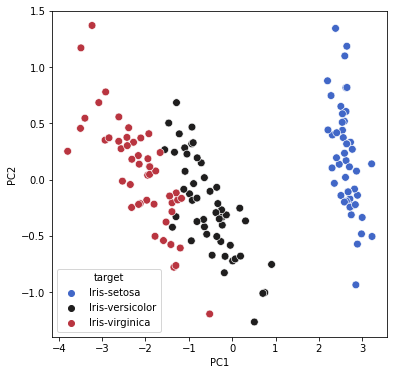

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')


## PCA a través de **sklearn**: gráfica scree

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True)
df.to_csv("iris_download.csv", index = False)
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.loc[:, 'sepal_len':'petal_wid'].values
y = df.loc[:, 'class'].values

pca = PCA()
X_r = pca.fit(X).transform(X)

In [ ]:
target_names = df.iloc[:,4].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

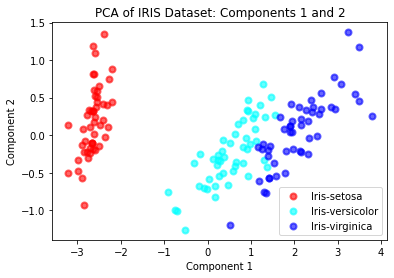

In [ ]:
def pca_scatter(pca1, pca2):
    plt.close
    plt.figure()
    colors = ['red', 'cyan', 'blue']
    lw = 2


    for color, target_name in zip(colors, target_names):
        plt.scatter(X_r[y == target_name, pca1], X_r[y == target_name, pca2], color=color, alpha=.6, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS Dataset: Components {} and {}'.format(pca1+1, pca2+1))
    plt.xlabel('Component {}'.format(pca1+1))
    plt.ylabel('Component {}'.format(pca2+1))
    plt.show()

pca_scatter(0, 1)

In [ ]:
X_r = pca.fit(X).transform(X)
print('\nEigenvalores \n%s' %pca.explained_variance_)
print('Eigenvectores \n%s' %pca.components_)


Eigenvalores 
[4.22484077 0.24224357 0.07852391 0.02368303]
Eigenvectores 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


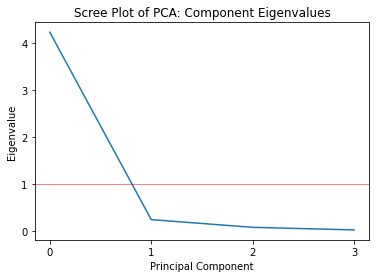

In [ ]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

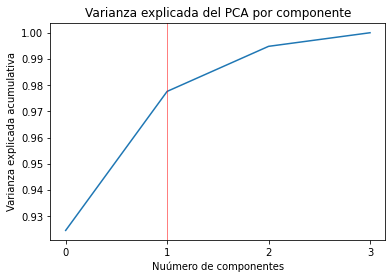

In [ ]:
def var_explicada():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Nuúmero de componentes')
    plt.ylabel('Varianza explicada acumulativa')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Varianza explicada del PCA por componente')
    show()

var_explicada()

## Ejercicios

1. Considera los siguientes puntos en $\mathbb{R}^{2}$:
	$$(4,11), \ (8,4), \ (13,5), \ (7,14).$$
Calcula las dos componentes principales y muestra que no están correlacionadas.

In [ ]:
import numpy as np

In [ ]:
X1 = [4, 8, 13, 7]
X2 = [11, 4, 5, 14]

In [ ]:
barX1 = sum(X1) / len(X1)
barX2 = sum(X2) / len(X2)

covX1X2 = sum((a - barX1) * (b - barX2) for (a,b) in zip(X1,X2)) / (len(X1)-1)

In [ ]:
varX1 = np.var(X1, ddof = 1)
varX2 = np.var(X2, ddof = 1)

print(varX1)
print(varX2)

14.0
23.0


In [ ]:
# La matriz de covarianza

S = np.cov(np.array(X1), np.array(X2))

print(S)

[[ 14. -11.]
 [-11.  23.]]


In [ ]:
eigen_val, eigen_vec = np.linalg.eigh(S)

print(eigen_val)
print(eigen_vec)

[ 6.61513568 30.38486432]
[[-0.83025082 -0.55738997]
 [-0.55738997  0.83025082]]


Por lo tanto, la primera componente principal es:
$$\eta_{1}=-0.5573X_{11}+0.8303X_{12}.$$

In [ ]:
n = int(input("Ingresa:"))
suma = 0
for i in range(1, n):
    if(n % i == 0):
        suma = suma + i
if (suma == n):
    print("Perfecto!")
else:
    print("No perfecto!")

Ingresa:6
Perfecto!


In [ ]:
n = int(input("Ingresa:"))

L = []
for i in range(1, n):
    if(n % i == 0):
        L.append(i)

print(L)
print(sum(L))





Ingresa:28
[1, 2, 4, 7, 14]
28
